In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU
from tensorflow.keras.layers import Activation, Flatten, Dropout, TimeDistributed, Bidirectional
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling2D, MaxPooling1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import mean_squared_error
import tensorflow as tf
tf.keras.regularizers.l2(l=0.01)
tf.keras.regularizers.l1(l=0.01)
%matplotlib inline
np.random.seed(45)

In [62]:
# Reading the dataset

data = pd.read_csv('NYSE-Composite Index.csv')
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-01-02,641.719971,641.719971,641.719971,641.719971,641.719971,0
1,1980-01-03,638.020020,638.020020,638.020020,638.020020,638.020020,0
2,1980-01-04,646.799988,646.799988,646.799988,646.799988,646.799988,0
3,1980-01-07,649.229980,649.229980,649.229980,649.229980,649.229980,0
4,1980-01-08,661.809998,661.809998,661.809998,661.809998,661.809998,0


In [63]:
# Dropping irrelevant columns

data = data.drop(columns=['Date','Adj Close','Volume'])
data.head()

,Open,High,Low,Close
0,641.719971,641.719971,641.719971,641.719971
1,638.020020,638.020020,638.020020,638.020020
2,646.799988,646.799988,646.799988,646.799988
3,649.229980,649.229980,649.229980,649.229980
4,661.809998,661.809998,661.809998,661.809998


In [64]:
# Caculating mean of Open, High, Low and Close for predictions

OHLC_avg = data.mean(axis = 1)
OHLC_avg.shape

(10576,)

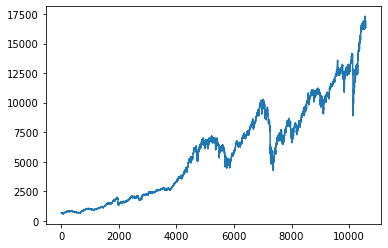

In [65]:
# Plotting  OHLC mean

plt.plot(OHLC_avg)

In [66]:
# Scaling the data values

data = np.reshape(OHLC_avg.values, (len(OHLC_avg),1)) 
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [67]:
print(data)

[[0.00340751]
 [0.00318628]
 [0.00371125]
 ...
 [0.95087855]
 [0.96588963]
 [0.97425681]]


In [68]:
# splitting dataset into train and test sets

train_size = int(len(data) * 0.75)
test_size = len(data)-train_size

train_data = data[0:train_size,:]
test_data = data[train_size:len(data),:1]

In [69]:
train_size, test_size

(7932, 2644)

In [70]:
# Function for converting data into sequences of size 10

def create_timeseries(dataset, time_step=1):
    
    X = []
    Y = []
    
    for i in range(len(dataset)-time_step-1):
        
        a = dataset[i:(i+time_step), 0]   
        X.append(a)
        Y.append(dataset[i + time_step, 0])
        
    return np.array(X), np.array(Y)

In [71]:
# Creating sequences from data

time_step = 10
X_train, y_train = create_timeseries(train_data, time_step)
X_test, y_test = create_timeseries(test_data, time_step)

In [72]:
# Checking the size of training and testing data

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7921, 10)
(7921,)
(2633, 10)
(2633,)


In [73]:
# Reshape input to be [samples, time steps, features] which is required for LSTM

X_train =X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)     

In [74]:
# Checking the shape of the data

print(X_train.shape)
print(X_test.shape)

(7921, 10, 1)
(2633, 10, 1)


In [15]:
#--------------------------- Stacked LSTM model -------------------------------------------

In [16]:
# Create the LSTM Model

lstm = Sequential()
lstm.add(LSTM(64, input_shape = (time_step, 1), return_sequences = True))
lstm.add(LSTM(32, return_sequences = True))
lstm.add(LSTM(32, return_sequences = True))
lstm.add(LSTM(16))
lstm.add(Dense(1, activation = 'linear'))

In [17]:
# Model Compiling and training

lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=128, verbose=2)


Epoch 1/100
50/50 - 43s - loss: 0.0071 - val_loss: 3.3706e-04
Epoch 2/100
50/50 - 4s - loss: 7.9181e-05 - val_loss: 1.9208e-04
Epoch 3/100
50/50 - 3s - loss: 3.7148e-05 - val_loss: 3.0331e-04
Epoch 4/100
50/50 - 3s - loss: 3.1963e-05 - val_loss: 3.6667e-04
Epoch 5/100
50/50 - 3s - loss: 3.0963e-05 - val_loss: 4.7233e-04
Epoch 6/100
50/50 - 4s - loss: 3.1401e-05 - val_loss: 3.8720e-04
Epoch 7/100
50/50 - 4s - loss: 3.1371e-05 - val_loss: 4.5936e-04
Epoch 8/100
50/50 - 4s - loss: 3.1206e-05 - val_loss: 4.0181e-04
Epoch 9/100
50/50 - 3s - loss: 3.1343e-05 - val_loss: 4.5811e-04
Epoch 10/100
50/50 - 3s - loss: 3.1916e-05 - val_loss: 4.5007e-04
Epoch 11/100
50/50 - 3s - loss: 3.2292e-05 - val_loss: 3.5379e-04
Epoch 12/100
50/50 - 3s - loss: 3.2958e-05 - val_loss: 3.7784e-04
Epoch 13/100
50/50 - 3s - loss: 3.1601e-05 - val_loss: 4.8405e-04
Epoch 14/100
50/50 - 3s - loss: 3.2286e-05 - val_loss: 4.1254e-04
Epoch 15/100
50/50 - 3s - loss: 3.1134e-05 - val_loss: 4.5761e-04
Epoch 16/100
50/50 - 3

In [18]:
lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 64)            16896     
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 32)            12416     
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 32)            8320      
_________________________________________________________________
lstm_3 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 40,785
Trainable params: 40,785
Non-trainable params: 0
_________________________________________________________________


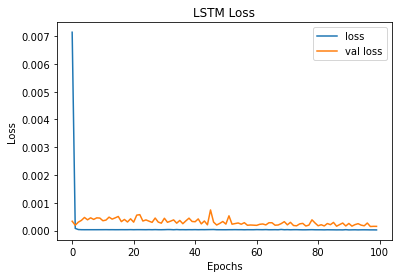

In [19]:
# Plotting training and validation losses

plt.plot(lstm.history.history['loss'], label = 'loss')
plt.plot(lstm.history.history['val_loss'], label = 'val loss')
plt.title('LSTM Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [20]:
# Predictions using trained lstm model

lstmtrainPredict = lstm.predict(X_train)
lstmtestPredict = lstm.predict(X_test)

In [21]:
# Inverse Scaling for plotting and RMSE calculations

lstmtrainPredict = scaler.inverse_transform(lstmtrainPredict)
lstmy_train = scaler.inverse_transform([y_train])
lstmtestPredict = scaler.inverse_transform(lstmtestPredict)
lstmy_test = scaler.inverse_transform([y_test])

In [22]:
# Training RMSE

train_rmse = np.sqrt(mean_squared_error(lstmy_train[0], lstmtrainPredict[:,0]))
print('Train RMSE: %.2f' % (train_rmse))

Train RMSE: 115.17


In [23]:
# Test RMSE

test_rmse = np.sqrt(mean_squared_error(lstmy_test[0], lstmtestPredict[:,0]))
print('Test RMSE: %.2f' % (test_rmse))

Test RMSE: 836.43


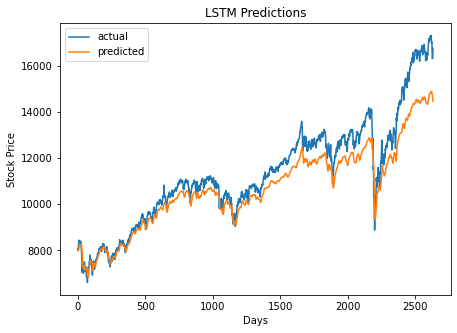

In [24]:
# Plotting actual vs predicted prices

plt.figure(figsize=(7,5))
testY = lstmy_test.reshape(-1,1)
plt.plot(testY, label = 'actual')
plt.plot(lstmtestPredict,label = 'predicted')
plt.title('LSTM Predictions')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [75]:
#-----------------------  CNN Model  ---------------------------------------

In [76]:
# Reshape input to that which is required for CNN and check shape

X_train =X_train.reshape(X_train.shape[0], 1, X_train.shape[1], 1) 
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1], 1)    

print(X_train.shape)
print(X_test.shape)

(7921, 1, 10, 1)
(2633, 1, 10, 1)


In [77]:
# Create the CNN Model

cnn = Sequential()
cnn.add(Conv2D(8, kernel_size = (1, 2), strides = (1, 1),  padding = 'valid', 
               activation = 'relu', input_shape = (1,10,1)))
cnn.add(MaxPooling2D(pool_size = (1,2)))

cnn.add(Flatten())
cnn.add(Dense(64, activation="relu"))
cnn.add(Dropout(0.5))
cnn.add(Dense(1, activation="relu"))
cnn.summary()   

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 9, 8)           24        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 4, 8)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 2,201
Trainable params: 2,201
Non-trainable params: 0
____________________________________________________

In [78]:
# compiling and training model

cnn.compile(loss='mean_squared_error', optimizer='adam')
cnn.fit(X_train,y_train, validation_split=0.2, batch_size = 128, verbose=1,epochs = 100)

Epoch 1/100
50/50 [==============================] - 2s 18ms/step - loss: 0.0109 - val_loss: 0.0040
Epoch 2/100
50/50 [==============================] - 2s 32ms/step - loss: 0.0029 - val_loss: 0.0015
Epoch 3/100
50/50 [==============================] - 0s 9ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 4/100
50/50 [==============================] - 0s 9ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 5/100
50/50 [==============================] - 0s 9ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 6/100
50/50 [==============================] - 0s 8ms/step - loss: 0.0015 - val_loss: 8.6909e-04
Epoch 7/100
50/50 [==============================] - 0s 8ms/step - loss: 0.0014 - val_loss: 9.7878e-04
Epoch 8/100
50/50 [==============================] - 0s 8ms/step - loss: 0.0013 - val_loss: 9.5026e-04
Epoch 9/100
50/50 [==============================] - 0s 8ms/step - loss: 0.0013 - val_loss: 8.3619e-04
Epoch 10/100
50/50 [==============================] - 1s 27ms/step - loss: 0.0012 - val_los

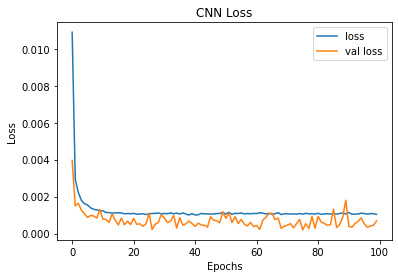

In [79]:
# Plotting training and validation losses

plt.plot(cnn.history.history['loss'], label = 'loss')
plt.plot(cnn.history.history['val_loss'], label = 'val loss')
plt.title('CNN Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [80]:
# Predictions using trained cnn model

cnntrainPredict = cnn.predict(X_train)
cnntestPredict = cnn.predict(X_test)

In [81]:
# Rescaling for plotting and rmse values

cnntrainPredict = scaler.inverse_transform(cnntrainPredict)
cnny_train = scaler.inverse_transform([y_train])
cnntestPredict = scaler.inverse_transform(cnntestPredict)
cnny_test = scaler.inverse_transform([y_test])

In [82]:
# Training RMSE

train_rmse = np.sqrt(mean_squared_error(cnny_train[0], cnntrainPredict[:,0]))
print('Train RMSE: %.2f' % (train_rmse))

Train RMSE: 299.74


In [83]:
# Test RMSE

test_rmse = np.sqrt(mean_squared_error(cnny_test[0], cnntestPredict[:,0]))
print('Test RMSE: %.2f' % (test_rmse))

Test RMSE: 789.05


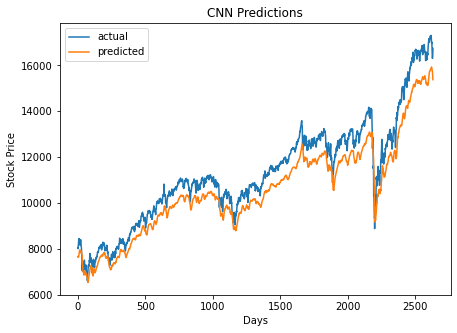

In [84]:
# Plotting actual vs predicted prices

plt.figure(figsize=(7,5))
testY = cnny_test.reshape(-1,1)
plt.plot(testY, label = 'actual')
plt.plot(cnntestPredict,label = 'predicted')
plt.title('CNN Predictions')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [41]:
# ----------------- CNN-LSTM model -----------------------

In [42]:
# Checking shape of training data for CNN-LSTM

print(X_train.shape)
print(X_test.shape)

(7921, 1, 10, 1)
(2633, 1, 10, 1)


In [43]:
# Building CNN-LSTM Model

cnn_lstm = tf.keras.Sequential()
cnn_lstm.add(TimeDistributed(Conv1D(64, kernel_size=1, activation='relu', input_shape=(None, 10, 1))))
cnn_lstm.add(TimeDistributed(MaxPooling1D(2)))
cnn_lstm.add(TimeDistributed(Conv1D(64, kernel_size=1, activation='relu')))
cnn_lstm.add(TimeDistributed(MaxPooling1D(2)))
cnn_lstm.add(TimeDistributed(Flatten()))
cnn_lstm.add(Bidirectional(LSTM(100, return_sequences=True)))
cnn_lstm.add(Dropout(0.25))
cnn_lstm.add(Bidirectional(LSTM(100, return_sequences=False)))
cnn_lstm.add(Dropout(0.5))
cnn_lstm.add(Dense(1, activation='linear'))
cnn_lstm.compile(optimizer='adam', loss='mse')

In [44]:
# Fitting model

cnn_lstm.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=128, verbose=1)

Epoch 1/100
50/50 [==============================] - 35s 178ms/step - loss: 0.0091 - val_loss: 0.0014
Epoch 2/100
50/50 [==============================] - 1s 27ms/step - loss: 4.6337e-04 - val_loss: 2.0135e-04
Epoch 3/100
50/50 [==============================] - 1s 26ms/step - loss: 3.6106e-04 - val_loss: 3.1684e-04
Epoch 4/100
50/50 [==============================] - 4s 79ms/step - loss: 3.4164e-04 - val_loss: 2.1924e-04
Epoch 5/100
50/50 [==============================] - 5s 95ms/step - loss: 3.0697e-04 - val_loss: 1.8881e-04
Epoch 6/100
50/50 [==============================] - 4s 71ms/step - loss: 2.8779e-04 - val_loss: 2.1690e-04
Epoch 7/100
50/50 [==============================] - 2s 45ms/step - loss: 2.8506e-04 - val_loss: 3.5549e-04
Epoch 8/100
50/50 [==============================] - 1s 25ms/step - loss: 2.8749e-04 - val_loss: 1.7389e-04
Epoch 9/100
50/50 [==============================] - 1s 26ms/step - loss: 2.6614e-04 - val_loss: 3.3254e-04
Epoch 10/100
50/50 [==============

50/50 [==============================] - 1s 25ms/step - loss: 1.4650e-04 - val_loss: 8.3890e-04
Epoch 77/100
50/50 [==============================] - 1s 24ms/step - loss: 1.4781e-04 - val_loss: 7.7453e-04
Epoch 78/100
50/50 [==============================] - 1s 24ms/step - loss: 1.4404e-04 - val_loss: 6.0065e-04
Epoch 79/100
50/50 [==============================] - 1s 25ms/step - loss: 1.5229e-04 - val_loss: 6.8696e-04
Epoch 80/100
50/50 [==============================] - 1s 25ms/step - loss: 1.4816e-04 - val_loss: 3.5386e-04
Epoch 81/100
50/50 [==============================] - 1s 24ms/step - loss: 1.4925e-04 - val_loss: 8.3791e-04
Epoch 82/100
50/50 [==============================] - 1s 24ms/step - loss: 1.4812e-04 - val_loss: 6.9039e-04
Epoch 83/100
50/50 [==============================] - 1s 24ms/step - loss: 1.3664e-04 - val_loss: 6.9913e-04
Epoch 84/100
50/50 [==============================] - 1s 24ms/step - loss: 1.3923e-04 - val_loss: 8.4983e-04
Epoch 85/100
50/50 [============

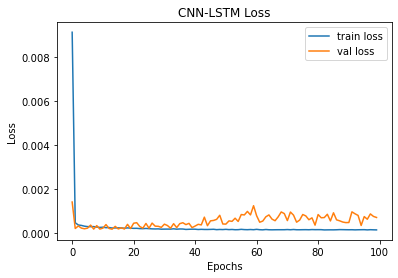

In [45]:
# Plotting training and validation losses

plt.plot(cnn_lstm.history.history['loss'], label='train loss')
plt.plot(cnn_lstm.history.history['val_loss'], label='val loss')
plt.title('CNN-LSTM Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [46]:
# Predictions using trained cnn-lstm model

trainPredict = cnn_lstm.predict(X_train)
testPredict = cnn_lstm.predict(X_test)

In [47]:
# Rescaling for plotting and rmse

trainPredict = scaler.inverse_transform(trainPredict)
y_train_cnnlstm = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test_cnnlstm = scaler.inverse_transform([y_test])

In [48]:
# Training RMSE

train_rmse = np.sqrt(mean_squared_error(y_train_cnnlstm[0], trainPredict[:,0]))
print('Train RMSE: %.2f' % (train_rmse))

Train RMSE: 212.12


In [49]:
# Test RMSE

test_rmse = np.sqrt(mean_squared_error(y_test_cnnlstm[0], testPredict[:,0]))
print('Test RMSE: %.2f' % (test_rmse))

Test RMSE: 1725.78


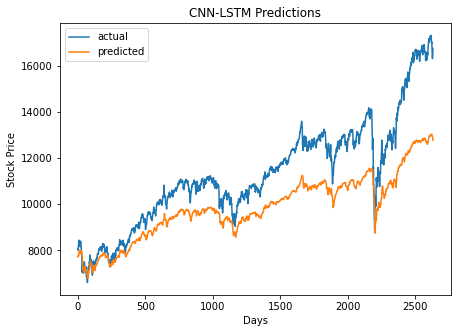

In [50]:
# Plotting actual vs predicted prices

plt.figure(figsize=(7,5))
testY = y_test_cnnlstm.reshape(-1,1)
plt.plot(testY, label = 'actual')
plt.plot(testPredict,label = 'predicted')
plt.title('CNN-LSTM Predictions')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [51]:
# ------------------------- GRU Model --------------------------

In [52]:
# Checking shape of training data

print(X_train.shape)

(7921, 1, 10, 1)


In [53]:
# Reshape input to that which is required for GRU

X_train = X_train.reshape(X_train.shape[0], X_train.shape[2], 1)  
X_test = X_test.reshape(X_test.shape[0], X_test.shape[2], 1)    

In [54]:
# Create GRU Model

gru = Sequential()
gru.add(GRU(units=50, return_sequences=True, input_shape=(10, 1), activation='tanh'))
gru.add(GRU(units=50, return_sequences=True, input_shape=(10, 1), activation='tanh'))
gru.add(Dropout(0.2))
gru.add(GRU(units=50, activation='tanh'))
gru.add(Dropout(0.2))
gru.add(Dense(units=1))

In [55]:
# Compiling and training the model

gru.compile(optimizer=SGD(learning_rate = 0.01, decay=1e-7, momentum=0.9, nesterov=False), loss='mean_squared_error')
gru.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=128, verbose=1)

Epoch 1/100
50/50 [==============================] - 21s 113ms/step - loss: 0.0199 - val_loss: 0.0617
Epoch 2/100
50/50 [==============================] - 3s 56ms/step - loss: 0.0084 - val_loss: 0.0233
Epoch 3/100
50/50 [==============================] - 3s 56ms/step - loss: 0.0029 - val_loss: 0.0059
Epoch 4/100
50/50 [==============================] - 3s 56ms/step - loss: 7.5872e-04 - val_loss: 5.8872e-04
Epoch 5/100
50/50 [==============================] - 3s 56ms/step - loss: 4.4713e-04 - val_loss: 2.0612e-04
Epoch 6/100
50/50 [==============================] - 3s 57ms/step - loss: 3.9596e-04 - val_loss: 1.2761e-04
Epoch 7/100
50/50 [==============================] - 3s 56ms/step - loss: 3.6746e-04 - val_loss: 1.2880e-04
Epoch 8/100
50/50 [==============================] - 3s 56ms/step - loss: 3.8888e-04 - val_loss: 1.4554e-04
Epoch 9/100
50/50 [==============================] - 3s 56ms/step - loss: 3.6323e-04 - val_loss: 1.2887e-04
Epoch 10/100
50/50 [==============================

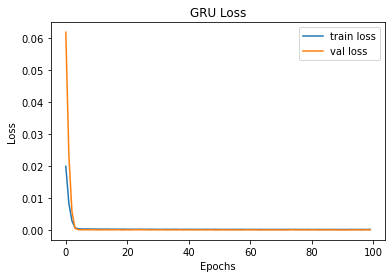

In [56]:
# Plotting training and validation losses

plt.plot(gru.history.history['loss'], label='train loss')
plt.plot(gru.history.history['val_loss'], label='val loss')
plt.title('GRU Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [57]:
# Predictions using trained gru model

gru_trainPredict = gru.predict(X_train)
gru_testPredict = gru.predict(X_test)

In [58]:
# Inverse scaling for plotting and rmse values

gru_trainPredict = scaler.inverse_transform(gru_trainPredict)
y_train_gru = scaler.inverse_transform([y_train])
gru_testPredict = scaler.inverse_transform(gru_testPredict)
y_test_gru = scaler.inverse_transform([y_test])

In [59]:
# Training RMSE

train_rmse = np.sqrt(mean_squared_error(y_train_gru[0], gru_trainPredict[:,0]))
print('Train RMSE: %.2f' % (train_rmse))

Train RMSE: 102.76


In [60]:
# Test RMSE

test_rmse = np.sqrt(mean_squared_error(y_test_gru[0], gru_testPredict[:,0]))
print('Test RMSE: %.2f' % (test_rmse))

Test RMSE: 323.03


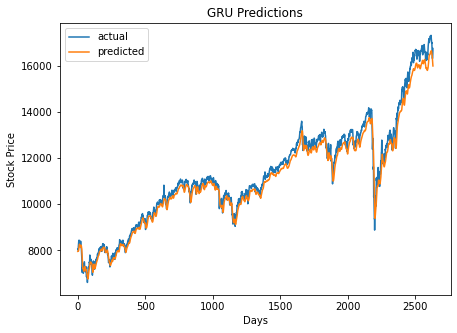

In [61]:
# Plotting actual vs predicted prices

plt.figure(figsize=(7,5))
testY = y_test_gru.reshape(-1,1)
plt.plot(testY, label = 'actual')
plt.plot(gru_testPredict,label = 'predicted')
plt.title('GRU Predictions')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()